In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [32]:
df = pd.read_csv('./data/fish.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [33]:
x = df.loc[:,'Weight': 'Width']
x.shape

(159, 5)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_sc = scaler.fit_transform(x)

In [35]:
y = df.loc[:,'Species']
y.shape

(159,)

In [36]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [49]:
# y 문자형
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_enc.shape

(159,)

In [50]:
np.unique(y_enc)

array([0, 1, 2, 3, 4, 5, 6])

In [38]:
# y 카테고리형
from tensorflow.keras.utils import to_categorical
y_oh = to_categorical(y_enc)
y_oh

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [39]:
x_sc

array([[1.46666667e-01, 3.09090909e-01, 3.58108108e-01, 5.68334049e-01,
        4.18978349e-01],
       [1.75757576e-01, 3.25454545e-01, 3.78378378e-01, 6.24055350e-01,
        4.59235453e-01],
       [2.06060606e-01, 3.29090909e-01, 3.76689189e-01, 6.18123353e-01,
        5.14278868e-01],
       [2.20000000e-01, 3.74545455e-01, 4.17229730e-01, 6.38566105e-01,
        4.80364795e-01],
       [2.60606061e-01, 3.74545455e-01, 4.25675676e-01, 6.21965801e-01,
        5.76003608e-01],
       [2.72727273e-01, 3.87272727e-01, 4.37500000e-01, 6.89202837e-01,
        5.46882048e-01],
       [3.03030303e-01, 3.87272727e-01, 4.34121622e-01, 7.22699465e-01,
        5.96371786e-01],
       [2.36363636e-01, 3.92727273e-01, 4.42567568e-01, 6.35083524e-01,
        5.13419035e-01],
       [2.72727273e-01, 3.92727273e-01, 4.44256757e-01, 7.12565153e-01,
        5.35098106e-01],
       [3.03030303e-01, 4.05454545e-01, 4.62837838e-01, 7.25433291e-01,
        5.51392648e-01],
       [2.87878788e-01, 4.1090

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc,y_oh)

In [52]:
x_train.shape

(119, 5)

In [53]:
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               768       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 7)                 231       
                                                                 
Total params: 11,335
Trainable params: 11,335
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [55]:
hist = model.fit(x_train,y_train,epochs=100, batch_size=10,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 1.9331 - accuracy: 0.3263 - val_loss: 1.8905 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8609 - accuracy: 0.3684 - val_loss: 1.8338 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7927 - accuracy: 0.3684 - val_loss: 1.7709 - val_accuracy: 0.3333
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7133 - accuracy: 0.3684 - val_loss: 1.7060 - val_accuracy: 0.3333
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.6347 - accuracy: 0.3684 - val_loss: 1.6582 - val_accuracy: 0.3333
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.5719 - accuracy: 0.4105 - val_loss: 1.6156 - val_accuracy: 0.4583
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.5307 - accuracy: 0.5368 - val_loss: 1.5707 - val_accuracy: 0.5000
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8526 - val_loss: 0.2560 - val_accuracy: 0.9167
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8316 - val_loss: 0.2675 - val_accuracy: 0.8750
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8421 - val_loss: 0.2730 - val_accuracy: 0.8750
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.8421 - val_loss: 0.2594 - val_accuracy: 0.9167
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8526 - val_loss: 0.2409 - val_accuracy: 0.9167
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.8526 - val_loss: 0.2454 - val_accuracy: 0.9167
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8316 - val_loss: 0.2480 - val_accuracy: 0.9167
Epoch 

In [59]:
model.predict(x_sc).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 2, 2, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 5], dtype=int64)

In [61]:
model.evaluate(x_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

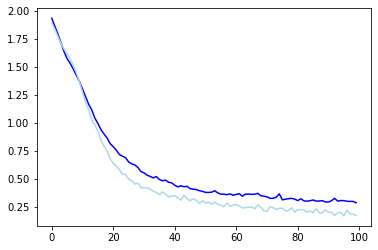

In [57]:
plt.plot(hist.history['loss'],color='b')
plt.plot(hist.history['val_loss'], color='lightblue')